## <span style="color:orange">Nicolas Leguizamón, código: 201727960 </span>
## <span style="color:orange">Leidy Araque Molina, código: 201727196 </span>

 <h1> <center> <span style="color:orange"> FINAL PROJECT - IMAGE MODELS</span></center></h1>

In [15]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from skimage import io
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from livelossplot import PlotLossesKeras
%matplotlib inline

# Read Data

In [2]:
path = 'C:\\Users\\AsusPC\\Documents\\Analytics\\2018-Vacacional\\DeepLearning\\Project'

In [3]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [4]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [5]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


# Read Images

In [6]:
image = io.imread(os.path.join(path,'data','images_resize_gray', str(dataTraining.index[0]) + '_resize_gray.jpeg'))

In [7]:
image

array([[ 3,  3,  3, ..., 57, 55, 51],
       [ 3,  3,  3, ..., 99, 98, 95],
       [ 3,  3,  3, ..., 97, 96, 94],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

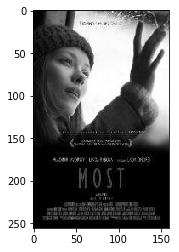

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

Read all images

In [9]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path,'data','images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|██████████| 7895/7895 [02:41<00:00, 48.74it/s]


In [10]:
images_training = np.stack(images_training)

images_training.shape, dataTraining.shape[0]

((7895, 40960), 7895)

In [12]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path,'data','images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

images_testing = np.stack(images_testing)

images_testing.shape, dataTesting.shape[0]

100%|██████████| 3383/3383 [00:35<00:00, 94.63it/s]


((3383, 40960), 3383)

#  <span style="color:orange">1. Machine Learning algorithm </span>

## Apply PCA

In [20]:
pca = PCA(n_components=32)
images_training_pca = pca.fit_transform(images_training)

In [21]:
images_testing_pca = pca.transform(images_testing)

this solution can turn into good results, however we consider that for image classification it is vital to perform a data augmentation, due to computer limitations we did not used it in this aprticular project and focused on the text features

# Create y

In [19]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [23]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training_pca, y_genres, test_size=0.33, random_state=42)

# Train multi-class multi-label model

In [24]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [25]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [26]:
y_pred_genres = clf.predict_proba(X_test)

In this matter we would like to comment that we used several other techniques such as GaussianNB and MLKNN, however Python kept on prompting a sparsity error that we could not fix at the time, it could be due to the nature of the data, we consider in the future to enable augmentation to avoid this mishappen.

we uploaded this model to Kaggle and obtained the average results, we strongly expect that the CNN can yield better overall performance.

In [27]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5832413775124384

In [ ]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(images_testing_pca)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_img_RF.csv', index_label='ID')

#  <span style="color:orange">2. Deep Learning algorithm </span>

Read images

in this Part we used a technique that allowed us to improve the computing performance, in principle we reduced the size of the image into a 32 x 32 and imported one by one via a for loop, later we append all those images into the set and used numpy stack to concatenate such data into a vector for the sake of inputting into the CNN. we operated in the same way for the y variable vector.

In [13]:
images=os.listdir(os.path.join(path,'data', 'images_resize_gray'))
indx= dataTraining.index

In [16]:
from keras.preprocessing import image

images_w = []
for img in images:
    img_path=os.path.join(path,'data', 'images_resize_gray', img)  
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_w.append(x)

In [17]:
x_data=images_w
x_data = np.vstack( x_data )
x_data = x_data[indx]

In [20]:
y_genres = np.vstack( y_genres )

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_genres, test_size=0.30, random_state=13)


## Transfer Learning

we constructed the matrix based by means of combining a NN we used in the CIFAR project worked previously in class with some layers of the well know model VGG16, we tried to use lighter models such as mobileNET and resNET, but the outcome was not accurate to our concept, we felt more comfortable with VGG16 using imagenet weights and led to the best results in terms of CP/time available. we used the hyperbolical tangent activation to avoid the CNN to get stuck. 
the model as follows:

In [29]:
#from keras_applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16


In [30]:
model_transfer = VGG16(weights='imagenet', include_top=False)

In [33]:
X_train_trans = model_transfer.predict(X_train) #Crea la nueva X_train basada en VGG16
X_train_trans.shape

(5526, 1, 1, 512)

In [34]:
X_test_trans = model_transfer.predict(X_test) #Crea la nueva X_test basada en VGG16
X_test_trans.shape

(2369, 1, 1, 512)

 <span style="color:orange">Model 1</span>

In [46]:
# Create model

model = Sequential()
model.add(Flatten(input_shape=(1,1,512)))

model.add(Dense(units=512, input_dim=1))
model.add(Activation('tanh'))

model.add(Dropout(0.5))      

model.add(Dense(units=24, input_dim=1))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                12312     
_________________________________________________________________
activation_8 (Activation)    (None, 24)                0         
Total params: 274,968
Trainable params: 274,968
Non-trainable params: 0
_________________________________________________________________


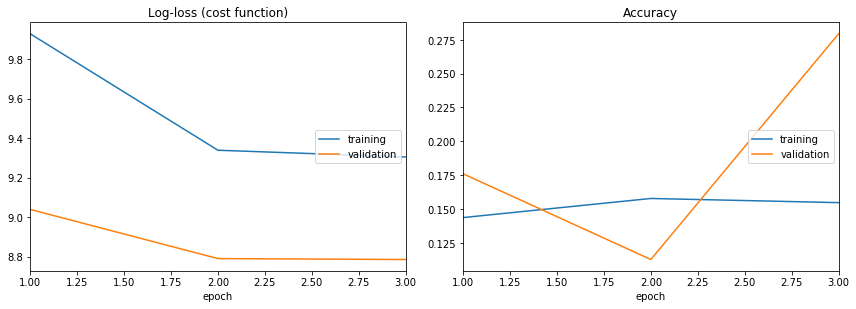

In [47]:
# Fit the model other way

from livelossplot import PlotLossesKeras
%matplotlib inline

model.fit(X_train_trans, y_train, validation_data=[X_test_trans, y_test], 
          batch_size=1, epochs=3, verbose=2,
          callbacks=[PlotLossesKeras()])

its interesting to note the improved accuracy of the model in the validation set

In [44]:
X_data_trans = model_transfer.predict(x_data) #Crea la nueva X_train basada en VGG16
X_data_trans.shape

(7895, 1, 1, 512)

In [50]:
model.fit(X_data_trans, y_genres, epochs=30, verbose = 2)

Epoch 1/30
 - 2s - loss: 7.7915 - acc: 0.2098
Epoch 2/30
 - 2s - loss: 7.7562 - acc: 0.2171
Epoch 3/30
 - 2s - loss: 7.7614 - acc: 0.2176
Epoch 4/30
 - 2s - loss: 7.7443 - acc: 0.2119
Epoch 5/30
 - 2s - loss: 7.7288 - acc: 0.2047
Epoch 6/30
 - 2s - loss: 7.7274 - acc: 0.2041
Epoch 7/30
 - 2s - loss: 7.7151 - acc: 0.2086
Epoch 8/30
 - 2s - loss: 7.7134 - acc: 0.2189
Epoch 9/30
 - 2s - loss: 7.7035 - acc: 0.2105
Epoch 10/30
 - 2s - loss: 7.7075 - acc: 0.2117
Epoch 11/30
 - 2s - loss: 7.7059 - acc: 0.2105
Epoch 12/30
 - 2s - loss: 7.7015 - acc: 0.2224
Epoch 13/30
 - 2s - loss: 7.6982 - acc: 0.2127
Epoch 14/30
 - 2s - loss: 7.6988 - acc: 0.2141
Epoch 15/30
 - 2s - loss: 7.6847 - acc: 0.2130
Epoch 16/30
 - 2s - loss: 7.6829 - acc: 0.2204
Epoch 17/30
 - 2s - loss: 7.6840 - acc: 0.2176
Epoch 18/30
 - 2s - loss: 7.6918 - acc: 0.2148
Epoch 19/30
 - 2s - loss: 7.6992 - acc: 0.2146
Epoch 20/30
 - 2s - loss: 7.6851 - acc: 0.2030
Epoch 21/30
 - 2s - loss: 7.6788 - acc: 0.2104
Epoch 22/30
 - 2s - lo

In [37]:
## Testing Kaggle
indxt = dataTesting.index
X_test_ka = images_w
X_test_ka = np.vstack( X_test_ka )
X_test_ka = X_test_ka[indxt]

In [39]:
X_test_trans_ka = model_transfer.predict(X_test_ka) #Crea la nueva X_train basada en VGG16
X_test_trans_ka.shape

(3383, 1, 1, 512)

In [51]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres =  model.predict(X_test_trans_ka)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_img_Trans.csv', index_label='ID')

With the previous model was obtained in <span style="color:blue">KAGGLE 0.50813</span>

we ran 30 epochs of the model, but is quite interesting to see that the model is not improved drastically we consider this could be due to the data size or the learning rate, in the future we will tune those. the model in Kaggle yielded worst result than the ML approach, we are going to evaluate some other models:

 <span style="color:orange">Model 2</span>

In [52]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_2 = Sequential()
model_2.add(Flatten(input_shape=(1,1,512)))


model_2.add(Dense(units=256, input_dim=1))
model_2.add(Activation('relu'))

model_2.add(Dropout(0.5))      

model_2.add(Dense(units=24, input_dim=1))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# model summary
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                6168      
_________________________________________________________________
activation_10 (Activation)   (None, 24)                0         
Total params: 137,496
Trainable params: 137,496
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_2.fit(X_data_trans, y_genres, epochs=30, verbose = 2)

Epoch 1/30
 - 1s - loss: 7.5012 - acc: 0.2082
Epoch 2/30
 - 1s - loss: 7.4703 - acc: 0.2056
Epoch 3/30
 - 1s - loss: 7.4498 - acc: 0.2063
Epoch 4/30
 - 1s - loss: 7.4615 - acc: 0.2061
Epoch 5/30
 - 1s - loss: 7.4331 - acc: 0.2067
Epoch 6/30
 - 1s - loss: 7.4159 - acc: 0.2115
Epoch 7/30
 - 1s - loss: 7.4124 - acc: 0.2070
Epoch 8/30
 - 1s - loss: 7.4236 - acc: 0.2119
Epoch 9/30
 - 1s - loss: 7.4204 - acc: 0.2098
Epoch 10/30
 - 1s - loss: 7.3970 - acc: 0.2092
Epoch 11/30
 - 1s - loss: 7.4024 - acc: 0.2067
Epoch 12/30
 - 1s - loss: 7.4012 - acc: 0.2070
Epoch 13/30
 - 1s - loss: 7.4098 - acc: 0.2046
Epoch 14/30
 - 1s - loss: 7.3998 - acc: 0.2079
Epoch 15/30
 - 1s - loss: 7.3935 - acc: 0.2079
Epoch 16/30
 - 1s - loss: 7.3913 - acc: 0.2089
Epoch 17/30
 - 1s - loss: 7.3925 - acc: 0.2085
Epoch 18/30
 - 1s - loss: 7.3850 - acc: 0.2091
Epoch 19/30
 - 1s - loss: 7.3712 - acc: 0.2081
Epoch 20/30
 - 1s - loss: 7.3747 - acc: 0.2087
Epoch 21/30
 - 1s - loss: 7.3765 - acc: 0.2113
Epoch 22/30
 - 1s - lo

In [55]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres =  model_2.predict(X_test_trans_ka)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_img_Trans_2.csv', index_label='ID')

With the previous model was obtained in <span style="color:blue">KAGGLE 0.51301</span>

We see that the accuracy did not improve drsatically even tough we change the activation to RELU, we consider that the CNN is doing the best with the Fed Data but is not enough.

 <span style="color:orange">Model 3</span>

In [76]:
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D

model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), padding='same',input_shape=x_data.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D (2,2))
model_3.add(Flatten())
model_3.add(Dropout(0.5))


model_3.add(Dense(24))
model_3.add(Activation('softmax'))


model_3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [78]:
model_3.fit(x_data, y_genres, epochs=30, verbose = 2)

Epoch 1/30
 - 96s - loss: 36.0651 - acc: 0.2091
Epoch 2/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 3/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 4/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 5/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 6/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 7/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 8/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 9/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 10/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 11/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 12/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 13/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 14/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 15/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 16/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 17/30
 - 16s - loss: 35.9539 - acc: 0.1977
Epoch 18/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 19/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 20/30
 - 15s - loss: 35.9539 - acc: 0.1977
Epoch 21/30
 - 15s - loss: 35

In [79]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres =  model_3.predict(X_test_ka)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_img_Trans_3.csv', index_label='ID')

in this last model W/o transfer learning the accuracy did not improve and the error increased dramatically, we conclude that the CNN is fed Correctly, since we are emulating the job done in the CIFAR project, however the image data seems to be the issue, also imagenet has many bird images and animal images into it that can cause to perform better on the bird challenge and led to not so good reults into this particular challenge.
Another important limitation is the computer power and setup we used for these conditions, it is strongly recommended that in order to outperform the model one must augment the images set also to avoid using a shallow network, these two reccomendations definitely require to use GPU instances.